In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
content = loadmat('../data/hw2/nn_data.mat')
X1 = np.array(content['X1'])
Y1 = np.array(content['Y1'])
X2 = np.array(content['X2'])
Y2 = np.array(content['Y2'])

In [3]:
from nn import *
from hw2 import *

In [4]:
# model = Network(
#     Linear(2, 512, is_input=True),
#     Sigmoid(),
#     Linear(512, 512),
#     Sigmoid(),
#     Linear(512, 3)
# )

In [5]:
model = Network(
    Linear(2, 512, is_input=True),
    Sigmoid(),
    Linear(512, 512),
    Sigmoid(),
    Linear(512, 1)
)

In [6]:
# X = np.random.randn(5000, 1).reshape((-1, 1))
# X = np.arange(500).reshape((-1, 1))
# Y = X / 2 + 1

In [7]:
# super parameters
batch_size = 128
learning_rate = 1E-3
epoch = 500
X, Y = X1, Y1

In [8]:
# dataloader = DataLoader(X2, Y2, batch_size=64, shuffle=True)
dataloader = DataLoader(X, Y, batch_size=batch_size, shuffle=True)
optimizer = Adam(model.parameters(), lr=learning_rate)
# optimizer = SGD(model.parameters(), lr=learning_rate)
loss_fn = MeanErrorLoss()

In [9]:
model.parameters()

{'365852409_weights': <nn.Parameter at 0x15c3af680>,
 '365852409_bias': <nn.Parameter at 0x15cea14f0>,
 '365863322_weights': <nn.Parameter at 0x15cefffb0>,
 '365863322_bias': <nn.Parameter at 0x15ceff110>,
 '365873775_weights': <nn.Parameter at 0x15ce775c0>,
 '365873775_bias': <nn.Parameter at 0x15cf217c0>}

In [10]:
# key = list(model.parameters().keys())[0]
# model.parameters()[key].value, model.parameters()[key].gradient

In [11]:
# num_iterations = 1
# loss_fn = MeanErrorLoss()
# optimizer = SGD(model.parameters(), lr=1000)
# size = len(dataloader)
# epoch_loss = []
# for i in range(num_iterations):
#     print(f"Epoch {i+1}\n-------------------------------")
#     for batch, (data, labels) in enumerate(dataloader):
#         output = model.forward(data)
#         loss = loss_fn.forward(output, labels)
#         gradient = loss_fn.backward()
#         model.backward(gradient)
#         optimizer.step()
#         # optimizer.zero_grad()  # !!! comment this line when testing !!!
#         break
#     epoch_loss.append(loss)

In [12]:
# key = list(model.parameters().keys())[0]
# model.parameters()[key].value, model.parameters()[key].gradient

In [13]:
record = train(model, dataloader, optimizer, loss_fn, num_iterations=epoch)

Epoch 1
-------------------------------
loss: 6325.904819  [  256/ 7600]
loss: 4544.625751  [  384/ 7600]
loss: 3583.778631  [  512/ 7600]
loss: 3096.630300  [  640/ 7600]
loss: 2816.909248  [  768/ 7600]
loss: 1840.828878  [  896/ 7600]
loss: 2079.356958  [ 1024/ 7600]
loss: 1746.496499  [ 1152/ 7600]
loss: 1932.151128  [ 1280/ 7600]
loss: 1995.381687  [ 1408/ 7600]
loss: 1912.301049  [ 1536/ 7600]
loss: 1843.774924  [ 1664/ 7600]
loss: 1778.624686  [ 1792/ 7600]
loss: 1710.409238  [ 1920/ 7600]
loss: 1846.912308  [ 2048/ 7600]
loss: 1630.735425  [ 2176/ 7600]
loss: 1480.501288  [ 2304/ 7600]
loss: 1647.216223  [ 2432/ 7600]
loss: 1734.743217  [ 2560/ 7600]
loss: 1803.488277  [ 2688/ 7600]
loss: 1646.168311  [ 2816/ 7600]
loss: 1669.485432  [ 2944/ 7600]
loss: 1299.784043  [ 3072/ 7600]
loss: 1798.858958  [ 3200/ 7600]
loss: 1876.234910  [ 3328/ 7600]
loss: 1666.239885  [ 3456/ 7600]
loss: 1585.376871  [ 3584/ 7600]
loss: 1558.655971  [ 3712/ 7600]
loss: 1435.883314  [ 3840/ 7600]
los

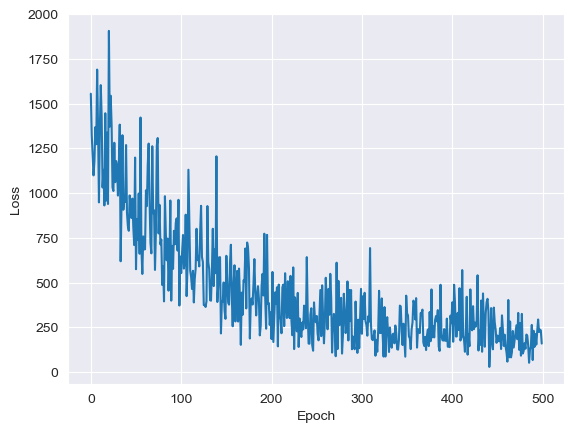

In [24]:
plt.plot(np.arange(len(record)), record)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig("loss-1-adam.png")

In [15]:
# pred = model.forward(X1)
# plt.scatter(X1, Y1)
# plt.scatter(X1, pred)
# plt.show()

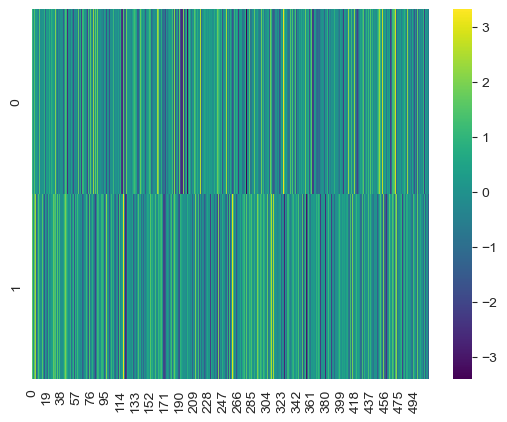

In [16]:
W1 = model.layers[0].weights.value
sns.heatmap(W1, cmap='viridis')
plt.show()

In [17]:
def convert_img(X: np.array, Y: np.array) -> np.array:
    """
    Convert the given X and Y to an image.
    """
    h, w, c = int(np.max(X[:, 0])), int(np.max(X[:, 1])), Y.shape[-1]
    img = np.zeros((h, w, c), dtype=np.uint8)
    for i in range(X.shape[0]):
        img[int(X[i, 0]) - 1, int(X[i, 1]) - 1, :] = Y[i]
    return img

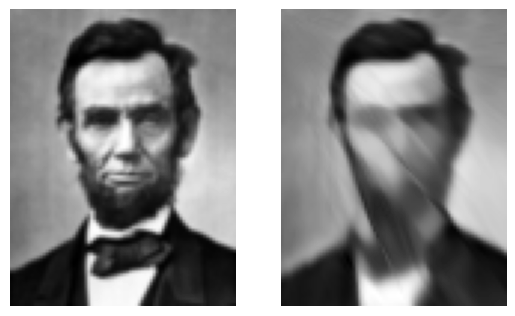

In [25]:
raw_img = convert_img(X1, Y1)
mapping_img = convert_img(X1, model(X1))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(raw_img, cmap="gray")
axs[0].axis('off')

axs[1].imshow(mapping_img, cmap='gray')
axs[1].axis('off')

plt.savefig("mapping-1-adam.png")